<a href="https://colab.research.google.com/github/EvgSkv/virtual_people_examples/blob/main/Panel_size_implication_for_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panel size implication for error

[evgskv](https://github.com/evgskv) (Google)

February 2022

A high level heurisitc rule is that a relative error of an estimate done on a sample of size $N$ will be proportional to $1/\sqrt{N}$. Coefficeint of this proportionality will vary depending on the metric calculated.

Informally we say: 

> Relative error of measurements for a demographic bucket (i.e. age band x gender) with $N$
> panelists will be _about_ $1/\sqrt{N}$.

For instance if we have a panel with each bucket having 500 panelists, then the error would be _about_ $\frac{1}{\sqrt{500}} \approx \frac{1}{1 / 22} \approx 4.5\% $

Standard deviation needs to be individually computed for each metric that we are interested in.

Below we show how error of precision depends on the precision itself and the number of panelists in the measured bucket. 

**We believe that 500 panelists per bucket usually achieves a reasonable error estimate.**

**A note on panel weights:** Sampling often needs to be corrected with weight, for example make all demo buckets fairly represented. It is important to remember that weighting decreases [effective panel size](https://en.wikipedia.org/wiki/Effective_sample_size). So the 500 threshold should be applied to effective panel size, whenever weighting makes effective size substantially different from simple count. 

Text(0, 0.5, 'Error of OTP due to panel noise')

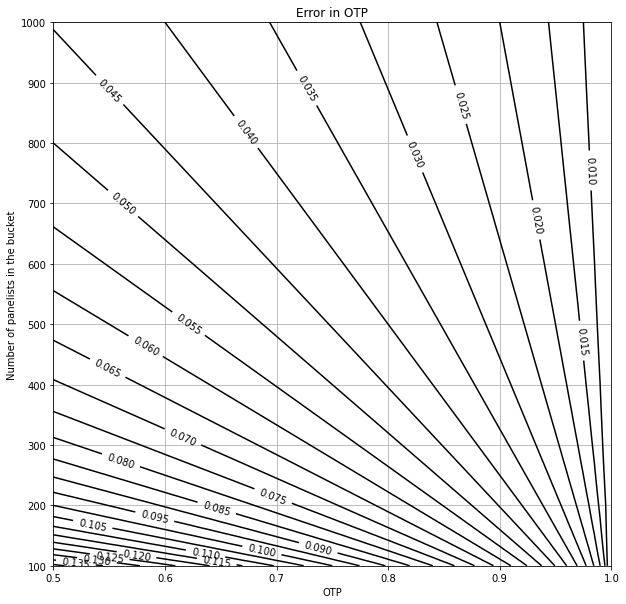

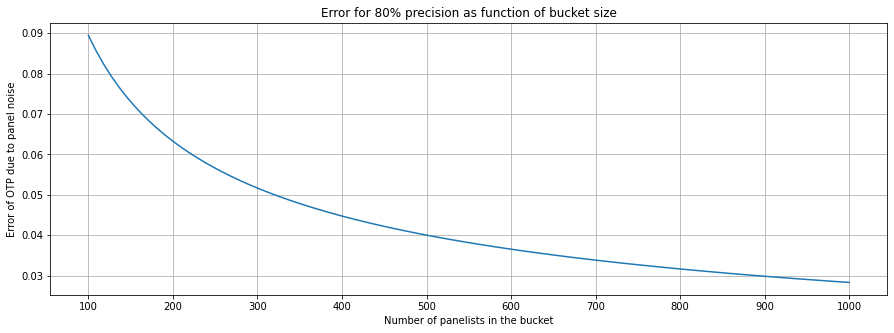

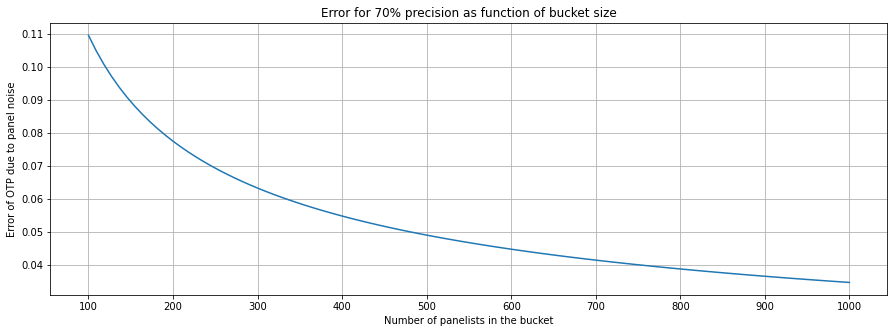

In [ ]:
import numpy
from matplotlib import pyplot

pyplot.figure(figsize=(10, 10))

precisions = numpy.linspace(0.5, 1, 100)
sizes = numpy.linspace(100, 1000, 100)

precision, size = numpy.meshgrid(precisions, sizes)

def PrecisionError(size, precision):
  # To make a ball-park estimate of the precision error we make a simplifying
  # assumption: we assume that the demo targeted campaign has reach equal to
  # the size of the demo bucket being targeted. Indeed this is about the
  # optimal situation: the reach can not be much larger, because there are no
  # more people to target, and then the smaller the reach is the higher the
  # error would be.
  # Thus if campaign has `precision`, it will reach
  # (size - size * precision) people outside of the demo bucket.
  # Assuming that precision is high we approximate standard deviaion by Poisson
  # standard deviaton. 
  negative_count_error = numpy.sqrt(size - size * precision)
  total_count = size
  # This is equivalent to:
  # 2 * sqrt(size - size * precision) / size =
  #   2 * sqrt(1 - precision) / sqrt(size)
  return 2 * negative_count_error / total_count  # 2 for 95% confidence interval.


relative_error = PrecisionError(size, precision)

contours = pyplot.contour(precisions, sizes, relative_error,
                          numpy.linspace(0.01, 0.21, 41),
                          colors='black')
pyplot.clabel(contours, inline=True)
pyplot.xlabel("OTP")
pyplot.ylabel("Number of panelists in the bucket")
pyplot.title("Error in OTP")
pyplot.grid(True)


pyplot.figure(figsize=(15, 5))
pyplot.title('Error for 80% precision as function of bucket size')
error_at_80 = PrecisionError(sizes, 0.8)
pyplot.xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
pyplot.plot(sizes, error_at_80)
pyplot.grid(True)
pyplot.xlabel('Number of panelists in the bucket')
pyplot.ylabel('Error of OTP due to panel noise')

pyplot.figure(figsize=(15, 5))
pyplot.title('Error for 70% precision as function of bucket size')
error_at_70 = PrecisionError(sizes, 0.7)
pyplot.xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
pyplot.plot(sizes, error_at_70)
pyplot.grid(True)
pyplot.xlabel('Number of panelists in the bucket')
pyplot.ylabel('Error of OTP due to panel noise')